# Lazy Sulo vs. PyCaret on Body Performance Dataset
## Guide

In [1]:
guide = "https://www.kaggle.com/code/rsesha/lazy-sulo-vs-pycaret-on-body-perf-75-bal-accu"

You can see that PyCaret produces slightly worse results than Lazy+Sulo while it takes much longer to produce results for even a small dataset.

If this were using a very large dataset, can you imagine the time difference?

The number of lines of code in Lazy+Sulo were 5-6 lines, similar to PyCaret.

## Make necessary imports

In [30]:
import opendatasets as od
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from lazytransform import LazyTransformer
from lazytransform import SuloClassifier
from pycaret.classification import *
import pycaret.classification as clf

## Importing data
### Import data

In [31]:
od.download("https://www.kaggle.com/datasets/kukuroo3/body-performance-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\body-performance-dataset" (use force=True to force download)


### Read data

In [32]:
file = 'body-performance-dataset/bodyPerformance.csv'
df = pd.read_csv(file)
print(df.shape)
df.head()

(13393, 12)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


<AxesSubplot: ylabel='Density'>

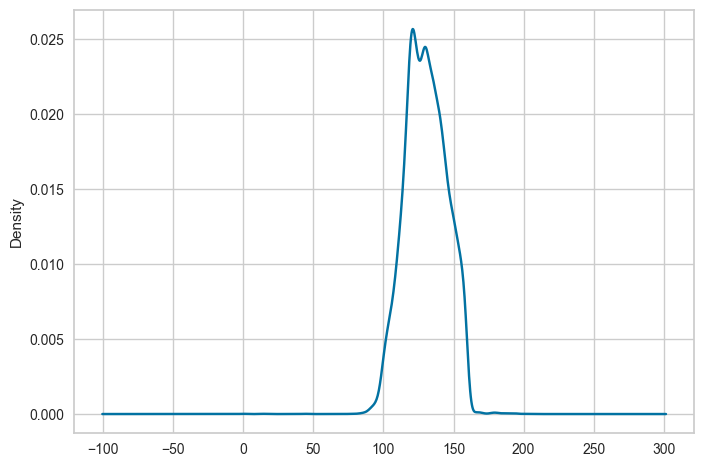

In [6]:
df['systolic'].plot(kind='kde')

In [33]:
df=df.replace({'M':0, 'F':1})
df=df.replace({'A':1,'B':2,'C':3,'D':4})

## Preprocessing

### Split Train/Test

In [34]:
target = 'class'
preds = [x for x in list(df) if x not in [target]]
len(preds)

11

In [35]:
train, test = train_test_split(df, test_size=0.1, random_state=99, stratify=df[target])
print(train.shape, test.shape)

(12053, 12) (1340, 12)


<AxesSubplot: >

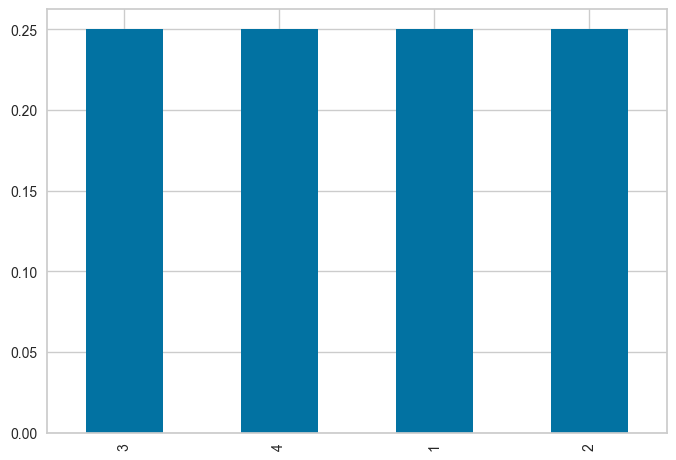

In [36]:
### Take a look at class distribution ##
train[target].value_counts(1).plot(kind='bar')

## Model - LazyTransformer

### LazyTransformer

In [13]:
lazy = LazyTransformer(model=None, encoders='auto', scalers=None, date_to_string=False,
        transform_target=False, imbalanced=False, save=False, combine_rare=False, verbose=0)

In [16]:
### if you are not using a model in pipeline, you must use fit and transform ###
X_train, y_train = lazy.fit_transform(train[preds], train[target])

    Single_Label Multi_Classification problem 
Shape of dataset: (12053, 11). Now we classify variables into different types...
Time taken to define data pipeline = 1 second(s)
No model input given...
Lazy Transformer Pipeline created...
    Time taken to fit dataset = 1 second(s)
    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (12053, 11)


In [17]:
X_test = lazy.transform(test[preds])

    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (1340, 11)


### SuloClassifier

In [18]:
model = SuloClassifier()

In [19]:
model = model.fit(X_train, y_train)

Input data shapes: X = (12053, 11)
    y shape = (12053,)
No GPU available on this device. Using CPU for lightgbm and others.
    Number of estimators used in SuloClassifier = 6


k-fold training:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1736
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 11
[LightGBM] [Info] Start training from score -1.386693
[LightGBM] [Info] Start training from score -1.379943
[LightGBM] [Info] Start training from score -1.385498
[LightGBM] [Info] Start training from score -1.393088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1736
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 11
[LightGBM] [Info] Start training from score -1.386693
[LightGBM] [Info] Start training from score -1.379943
[LightGBM] [Info] Start training f

k-fold training:  17%|█▋        | 1/6 [00:40<03:20, 40.10s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1737
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 11
[LightGBM] [Info] Start training from score -1.389086
[LightGBM] [Info] Start training from score -1.385896
[LightGBM] [Info] Start training from score -1.392687
[LightGBM] [Info] Start training from score -1.377571


k-fold training:  33%|███▎      | 2/6 [00:40<01:07, 16.93s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1736
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 11
[LightGBM] [Info] Start training from score -1.379547
[LightGBM] [Info] Start training from score -1.383511
[LightGBM] [Info] Start training from score -1.391085
[LightGBM] [Info] Start training from score -1.391085


k-fold training:  50%|█████     | 3/6 [00:41<00:28,  9.54s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1735
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 11
[LightGBM] [Info] Start training from score -1.392286
[LightGBM] [Info] Start training from score -1.390685
[LightGBM] [Info] Start training from score -1.377176
[LightGBM] [Info] Start training from score -1.385100


k-fold training:  67%|██████▋   | 4/6 [00:42<00:12,  6.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 11
[LightGBM] [Info] Start training from score -1.381130
[LightGBM] [Info] Start training from score -1.389086
[LightGBM] [Info] Start training from score -1.393489
[LightGBM] [Info] Start training from score -1.381527


k-fold training:  83%|████████▎ | 5/6 [00:43<00:04,  4.21s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1737
[LightGBM] [Info] Number of data points in the train set: 10045, number of used features: 11
[LightGBM] [Info] Start training from score -1.389585
[LightGBM] [Info] Start training from score -1.391184
[LightGBM] [Info] Start training from score -1.376487
[LightGBM] [Info] Start training from score -1.387988


k-fold training: 100%|██████████| 6/6 [00:44<00:00,  7.33s/it]

Final balanced Accuracy of 6-estimator SuloClassifier: 74.8%
Time Taken: 44 (seconds)


In [20]:
predictions = model.predict(X_test)
predictions

array([3, 1, 3, ..., 1, 4, 2])

In [21]:
test[target+'predictions'] = predictions
test.head(1)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,classpredictions
7357,60.0,0,172.4,66.5,26.5,78.0,118.0,38.4,10.9,21.0,161.0,3,3


In [22]:
print(classification_report(test[target].values, test[target+'predictions'].values))

              precision    recall  f1-score   support

           1       0.73      0.87      0.79       335
           2       0.63      0.63      0.63       335
           3       0.73      0.68      0.70       335
           4       0.92      0.80      0.86       335

    accuracy                           0.75      1340
   macro avg       0.75      0.75      0.75      1340
weighted avg       0.75      0.75      0.75      1340



## Model - PyCaret

In [37]:
exp_clf = clf.setup(train, target = 'class',session_id=1)

,Description,Value
0,Session id,1
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(12053, 12)"
5,Transformed data shape,"(12053, 12)"
6,Transformed train set shape,"(8437, 12)"
7,Transformed test set shape,"(3616, 12)"
8,Numeric features,11
9,Preprocess,True


In [38]:
best = clf.compare_models(include=['lr', 'dt', 'rf', 'ada', 'xgboost', 'lightgbm'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:45:57
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7509,0.9215,0.7509,0.7556,0.7504,0.6678,0.6695,0.5490
xgboost,Extreme Gradient Boosting,0.7471,0.9173,0.7471,0.7519,0.7472,0.6628,0.6642,1.1410
rf,Random Forest Classifier,0.7300,0.9110,0.7300,0.7333,0.7294,0.6400,0.6414,0.8480
dt,Decision Tree Classifier,0.6278,0.7519,0.6278,0.6296,0.6282,0.5038,0.5040,0.0550
lr,Logistic Regression,0.6130,0.8495,0.6130,0.6102,0.6109,0.4840,0.4844,1.3140
ada,Ada Boost Classifier,0.5970,0.7246,0.5970,0.6056,0.5984,0.4627,0.4639,0.1750


In [43]:
lgbm = clf.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7464,0.9178,0.7464,0.7469,0.7454,0.6619,0.6627
1,0.7275,0.9136,0.7275,0.7357,0.7282,0.6367,0.6386
2,0.7666,0.9336,0.7666,0.7709,0.7665,0.6888,0.6901
3,0.7464,0.9173,0.7464,0.7521,0.7453,0.6619,0.6643
4,0.7595,0.9190,0.7595,0.7663,0.7592,0.6793,0.6817
5,0.7464,0.9271,0.7464,0.7548,0.7492,0.6619,0.6627
6,0.7630,0.9237,0.7630,0.7648,0.7620,0.6840,0.6853
7,0.7450,0.9187,0.7450,0.7482,0.7447,0.6600,0.6611
8,0.7628,0.9266,0.7628,0.7644,0.7606,0.6837,0.6855


In [44]:
tuned_lgbm = clf.tune_model(lgbm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:49:14
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7168,0.9083,0.7168,0.7179,0.7167,0.6224,0.6228
1,0.7062,0.8994,0.7062,0.7144,0.7077,0.6082,0.6097
2,0.7524,0.9285,0.7524,0.7549,0.7518,0.6698,0.6709
3,0.7299,0.9091,0.7299,0.7320,0.7284,0.6398,0.6413
4,0.7334,0.9144,0.7334,0.7361,0.7315,0.6445,0.6467
5,0.7275,0.9184,0.7275,0.7344,0.7299,0.6367,0.6373
6,0.7322,0.9151,0.7322,0.7334,0.7317,0.6430,0.6437
7,0.7153,0.9077,0.7153,0.7166,0.7146,0.6204,0.6213
8,0.7450,0.9179,0.7450,0.7452,0.7424,0.6599,0.6616


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


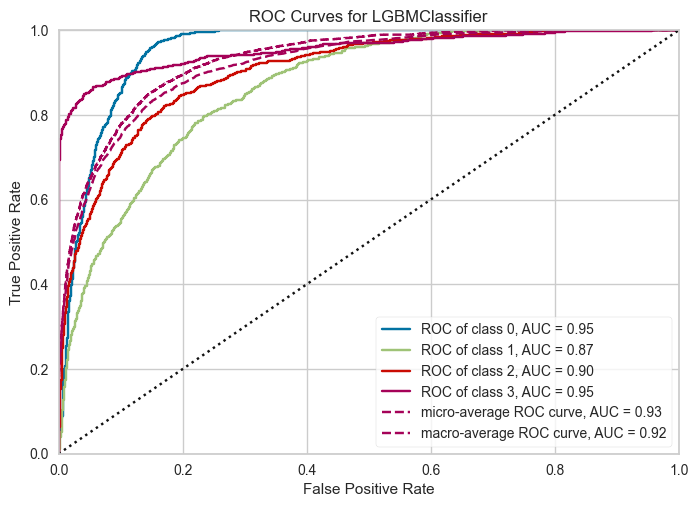

In [45]:
clf.plot_model(lgbm)

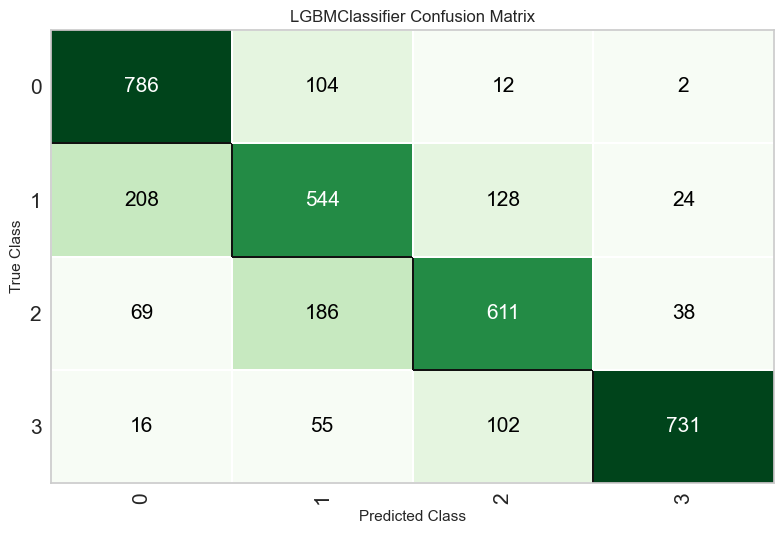

In [50]:
plot_model(lgbm, plot = 'confusion_matrix') 

In [46]:
final_lgbm = clf.finalize_model(tuned_lgbm)

In [47]:
predf = clf.predict_model(final_lgbm, data=test)
predf.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7418,0.9218,0.7418,0.7498,0.7416,0.6557,0.6582


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,prediction_label,prediction_score
7357,60.0,0,172.399994,66.500000,26.500000,78.0,118.0,38.400002,10.9,21.0,161.0,3,3,0.8826
13347,41.0,1,161.399994,67.900002,33.099998,76.0,119.0,34.900002,21.0,33.0,150.0,4,2,0.3889
11854,35.0,0,181.300003,78.599998,21.400000,91.0,137.0,41.400002,21.5,39.0,235.0,3,3,0.6238
11764,60.0,0,180.500000,64.900002,8.700000,77.0,118.0,43.400002,16.6,31.0,210.0,1,1,0.7274
5136,58.0,0,172.199997,67.000000,22.000000,72.0,116.0,34.799999,19.1,27.0,202.0,3,3,0.4442


In [49]:
print(classification_report(test[target].values,predf['prediction_label'].values))

              precision    recall  f1-score   support

           1       0.72      0.89      0.79       335
           2       0.61      0.61      0.61       335
           3       0.74      0.66      0.70       335
           4       0.93      0.80      0.86       335

    accuracy                           0.74      1340
   macro avg       0.75      0.74      0.74      1340
weighted avg       0.75      0.74      0.74      1340

